In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 25.csv to 25.csv


In [23]:
from google.colab import files
uploaded = files.upload()

Saving megaGymDataset.csv to megaGymDataset.csv


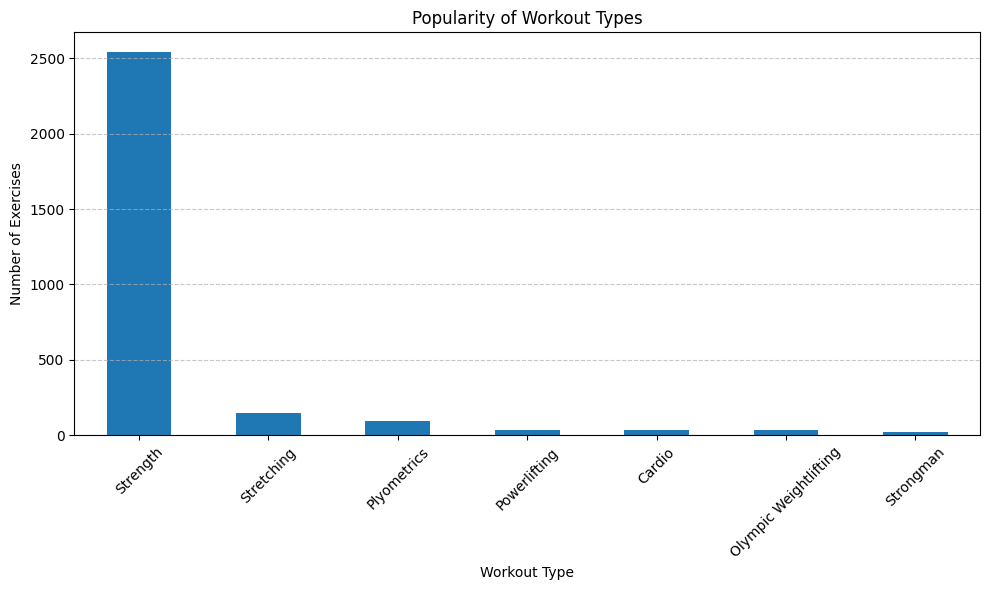

In [24]:
# Question 1
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'megaGymDataset.csv'
data = pd.read_csv(file_path)

workout_popularity = data['Type'].value_counts()

plt.figure(figsize=(10, 6))
workout_popularity.plot(kind='bar')
plt.title('Popularity of Workout Types')
plt.xlabel('Workout Type')
plt.ylabel('Number of Exercises')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Raw Gym Membership Dataset.xlsx to Raw Gym Membership Dataset.xlsx


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dailyActivity_merged.csv to dailyActivity_merged.csv


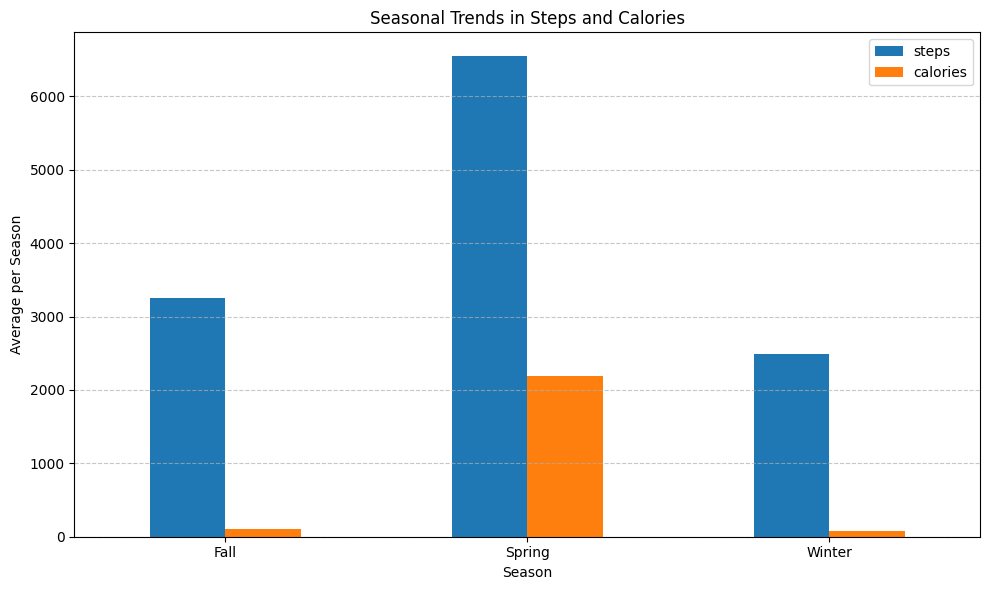

In [ ]:
# Question 2
import pandas as pd
import matplotlib.pyplot as plt

daily_activity_path = '/content/dailyActivity_merged.csv'
data1 = pd.read_csv(daily_activity_path)
data2 = pd.read_csv('/content/25.csv')

# First Dataset
data1['ActivityDate'] = pd.to_datetime(data1['ActivityDate'])
data1['month'] = data1['ActivityDate'].dt.month

# Preprocess the second dataset
data2['date'] = pd.to_datetime(data2['date'])
data2['month'] = data2['date'].dt.month

# Seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    return 'Unknown'

data1['season'] = data1['month'].apply(get_season)
data2['season'] = data2['month'].apply(get_season)

# Combined data
combined_data = pd.concat([
    data1[['season', 'TotalSteps', 'Calories']].rename(columns={'TotalSteps': 'steps', 'Calories': 'calories'}),
    data2[['season', 'step_count', 'calories_burned']].rename(columns={'step_count': 'steps', 'calories_burned': 'calories'})
])

seasonal_trends = combined_data.groupby('season')[['steps', 'calories']].mean()

seasonal_trends.plot(kind='bar', figsize=(10, 6))
plt.title('Seasonal Trends in Steps and Calories')
plt.ylabel('Average per Season')
plt.xlabel('Season')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


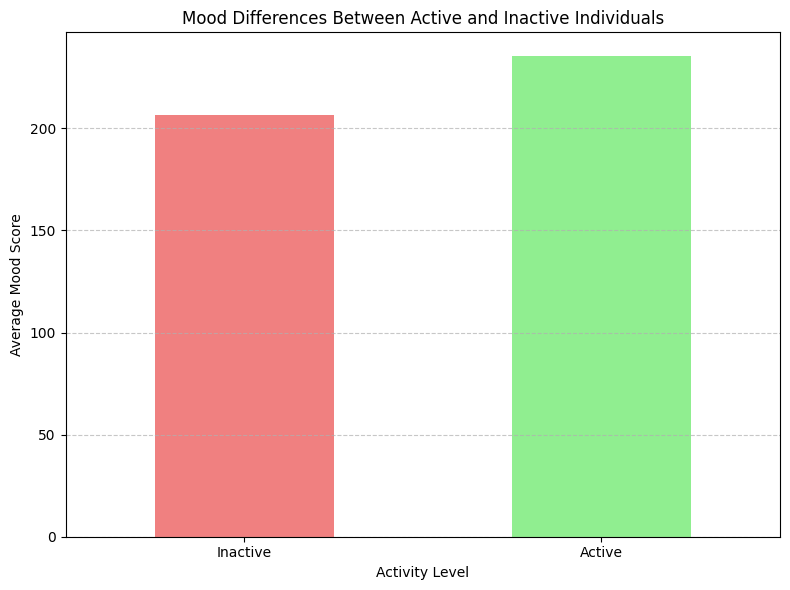

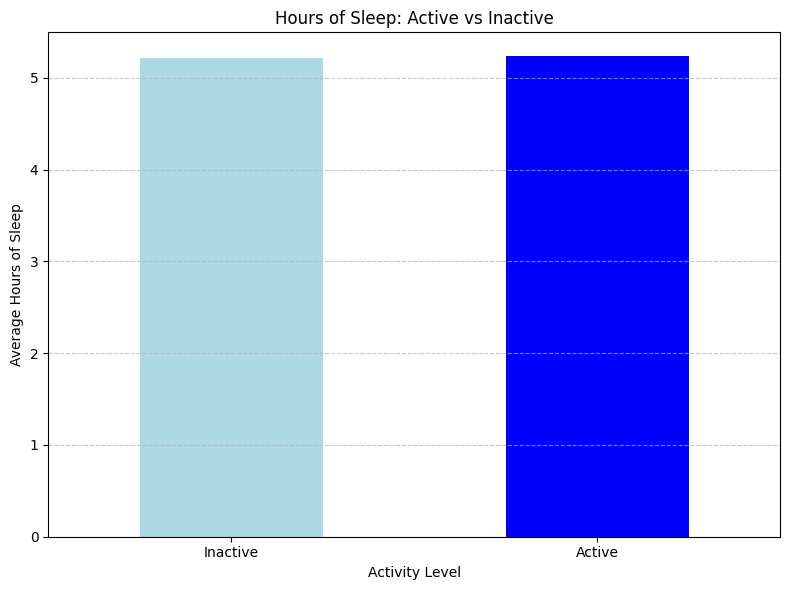

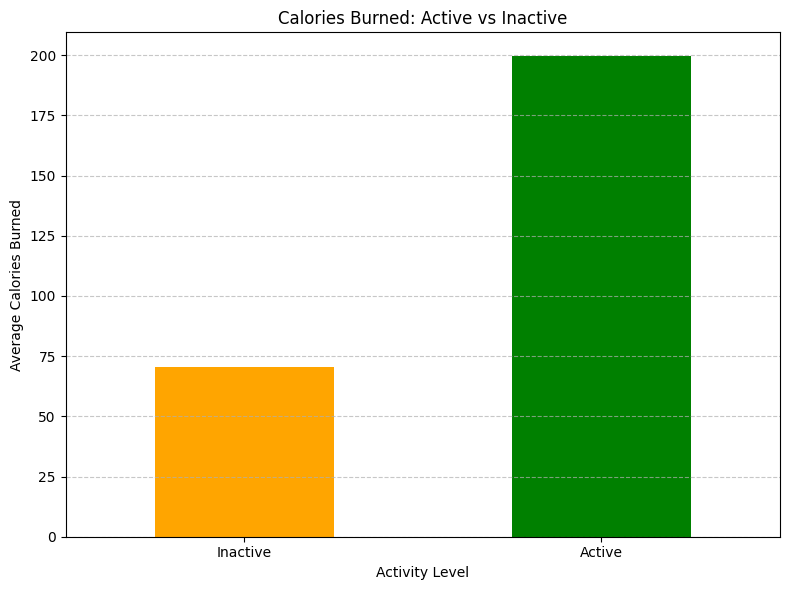

In [ ]:
# Question 3
import pandas as pd
import matplotlib.pyplot as plt

data_path = '/content/25.csv'
data = pd.read_csv(data_path)

# If step count is greater than 5,000 user is 'active'
data['active'] = data['step_count'] > 5000

# Average mood for active and inactive users
mood_comparison = data.groupby('active')['mood'].mean()

# Mood for active and inactive
plt.figure(figsize=(8, 6))
mood_comparison.plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Mood Differences Between Active and Inactive Individuals')
plt.xticks([0, 1], labels=['Inactive', 'Active'], rotation=0)
plt.ylabel('Average Mood Score')
plt.xlabel('Activity Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


comparison = data.groupby('active')[['hours_of_sleep', 'calories_burned']].mean()

# Sleep for active and inactive users
plt.figure(figsize=(8, 6))
comparison['hours_of_sleep'].plot(kind='bar', color=['lightblue', 'blue'])
plt.title('Hours of Sleep: Active vs Inactive')
plt.xticks([0, 1], labels=['Inactive', 'Active'], rotation=0)
plt.ylabel('Average Hours of Sleep')
plt.xlabel('Activity Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calories burned for active and inactive users
plt.figure(figsize=(8, 6))
comparison['calories_burned'].plot(kind='bar', color=['orange', 'green'])
plt.title('Calories Burned: Active vs Inactive')
plt.xticks([0, 1], labels=['Inactive', 'Active'], rotation=0)
plt.ylabel('Average Calories Burned')
plt.xlabel('Activity Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


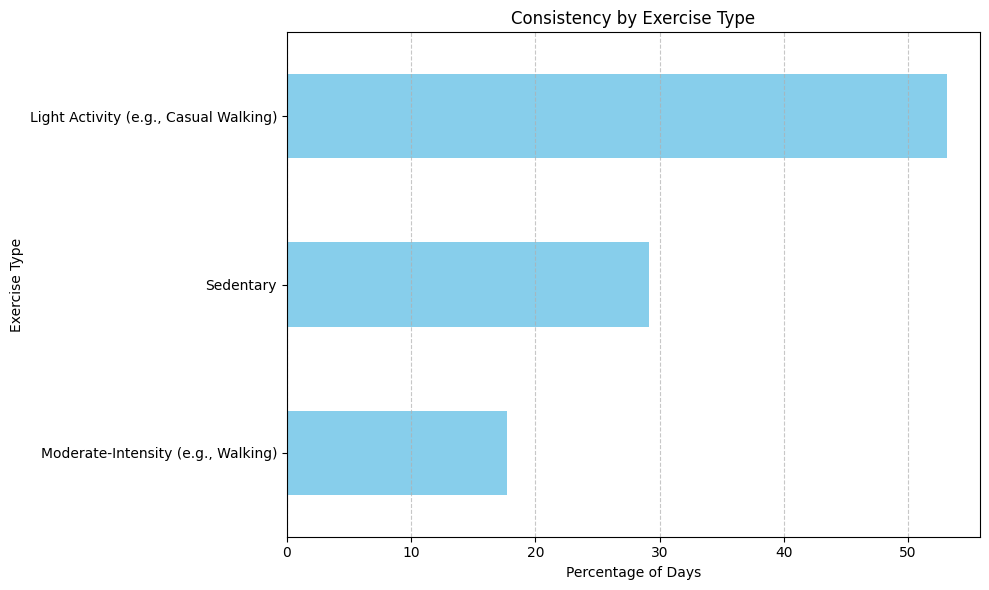

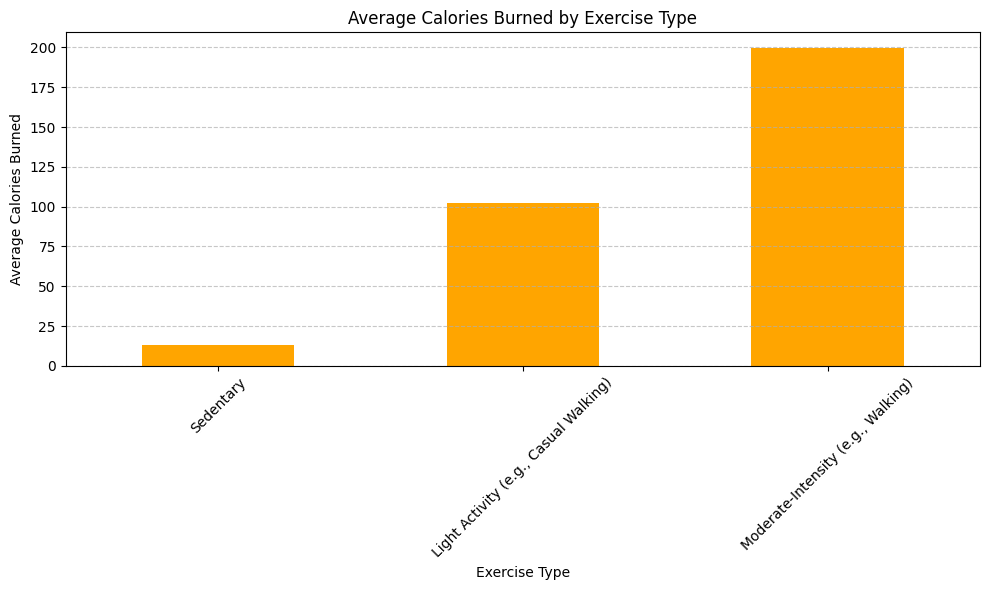

In [20]:
# Question 4
import pandas as pd
import matplotlib.pyplot as plt

data_path = '/content/25.csv'
data = pd.read_csv(data_path)

# Exercise types based on activity thresholds
def categorize_exercise(row):
    if row['step_count'] > 10000:
        return 'High-Intensity (e.g., Running)'
    elif row['step_count'] > 5000:
        return 'Moderate-Intensity (e.g., Walking)'
    elif row['step_count'] > 1000:
        return 'Light Activity (e.g., Casual Walking)'
    else:
        return 'Sedentary'

data['exercise_type'] = data.apply(categorize_exercise, axis=1)

# Group by exercise type and calculate consistency (e.g., frequency of days active)
consistency_trends = data['exercise_type'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
consistency_trends.sort_values().plot(kind='barh', color='skyblue')
plt.title('Consistency by Exercise Type')
plt.xlabel('Percentage of Days')
plt.ylabel('Exercise Type')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calories burned by exercise type
calories_by_exercise = data.groupby('exercise_type')['calories_burned'].mean()


plt.figure(figsize=(10, 6))
calories_by_exercise.sort_values().plot(kind='bar', color='orange')
plt.title('Average Calories Burned by Exercise Type')
plt.ylabel('Average Calories Burned')
plt.xlabel('Exercise Type')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving gym_membership.csv to gym_membership (1).csv


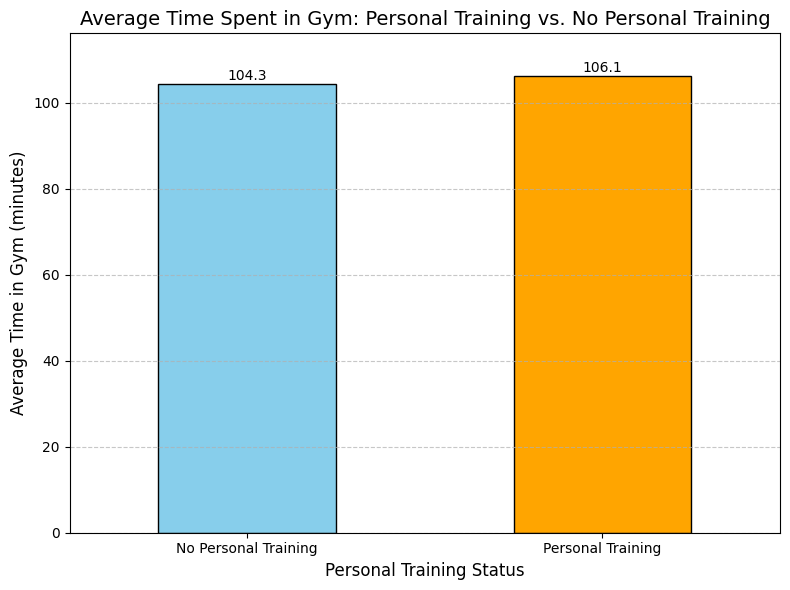

In [19]:
# Question 5
import pandas as pd
import matplotlib.pyplot as plt

data_path = '/content/gym_membership.csv'
data = pd.read_csv(data_path)

avg_time_in_gym = data.groupby('personal_training')['avg_time_in_gym'].mean()

plt.figure(figsize=(8, 6))
bars = avg_time_in_gym.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

for index, value in enumerate(avg_time_in_gym):
    plt.text(index, value + 1, f"{value:.1f}", ha='center', fontsize=10, color='black')

plt.ylim(0, avg_time_in_gym.max() + 10)
plt.title('Average Time Spent in Gym: Personal Training vs. No Personal Training', fontsize=14)
plt.xlabel('Personal Training Status', fontsize=12)
plt.ylabel('Average Time in Gym (minutes)', fontsize=12)
plt.xticks([0, 1], ['No Personal Training', 'Personal Training'], rotation=0, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()
